# Heart Disease Analysis

***Step 1: Import Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configure visualizations
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
print("Libraries Imported")

Libraries Imported


***Step 2: Load the Dataset***

In [32]:
file_path = "/heart_disease.csv"
data = pd.read_csv(file_path)
print(data.head())
print(data.info())

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

***Data Cleaning***

In [4]:
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(how='all')

# Remove rows with any missing values
data_cleaned = data_cleaned.dropna()

# Display the first few rows of the cleaned dataset
print("\nCleaned Data Head:")
print(data_cleaned.head())

# Display dataset information after cleaning
print("\nCleaned Data Info:")
print(data_cleaned.info())


Cleaned Data Head:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   
5  25.0    Male           152.0              257.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   
5                   No       No  28.144681                  No  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1            

***Checking for any missing values***

In [5]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


***Compute summary statistics***

# Step 4 : Compute summary statistics

In [6]:
summary_stats = data.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
                Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000     

In [10]:
from google.colab import files
# Save summary statistics to a CSV file
file_path = "summary_statistics.csv"
summary_stats.to_csv(file_path, index=True)

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 5: Data Visualizations

***5.1 Correlation Heatmap***

***Selecting only numeric columns***

In [16]:
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])

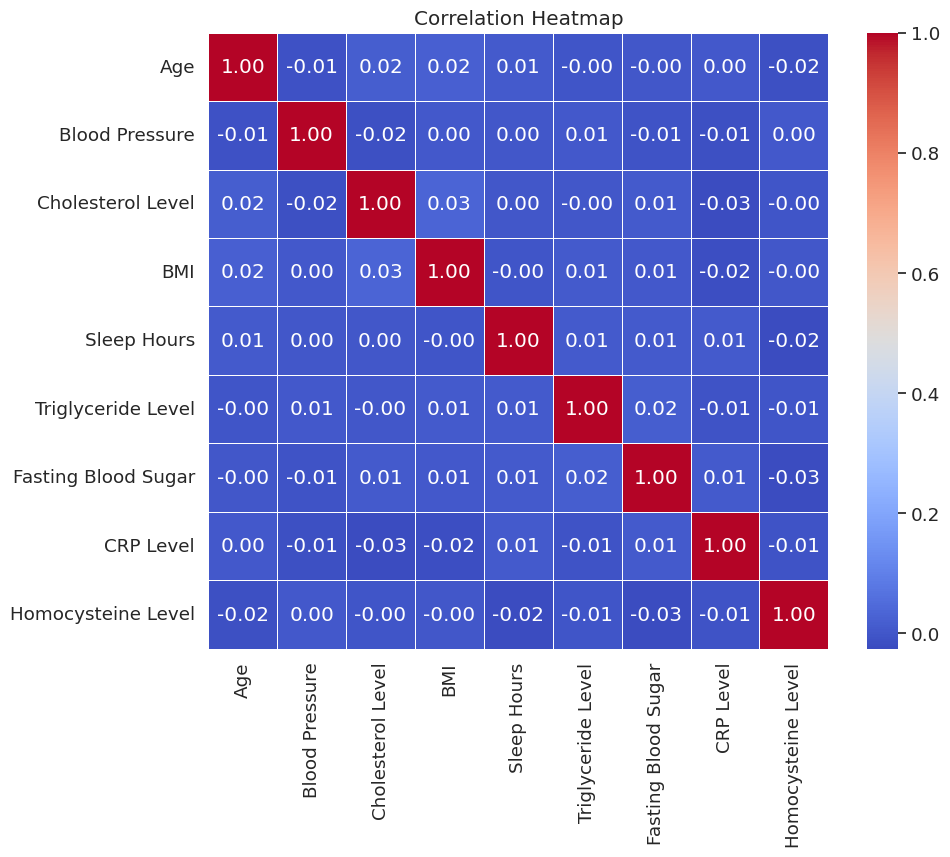

In [20]:
# heatmap for correlations
plt.figure(figsize=(10, 8))
#correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and labels
plt.title("Correlation Heatmap")
plt.show()

***5.2 Histogram of Age Plotting***

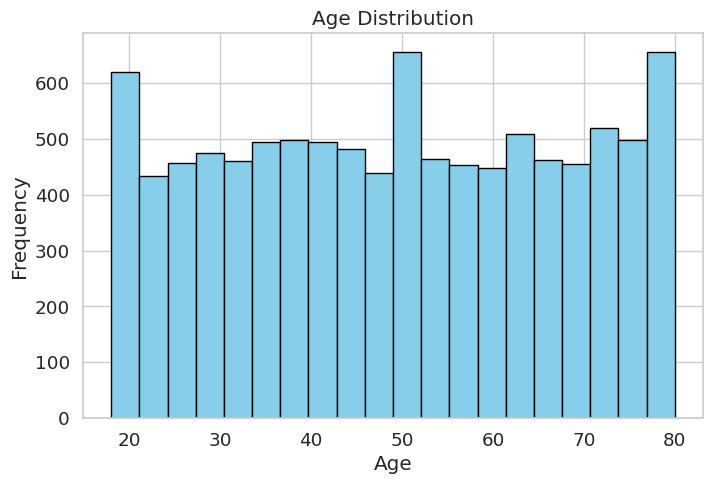

In [33]:
plt.figure(figsize=(8, 5))
data['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

***5.3 Scatter plot to analyze relationships Age VS cholesterol***

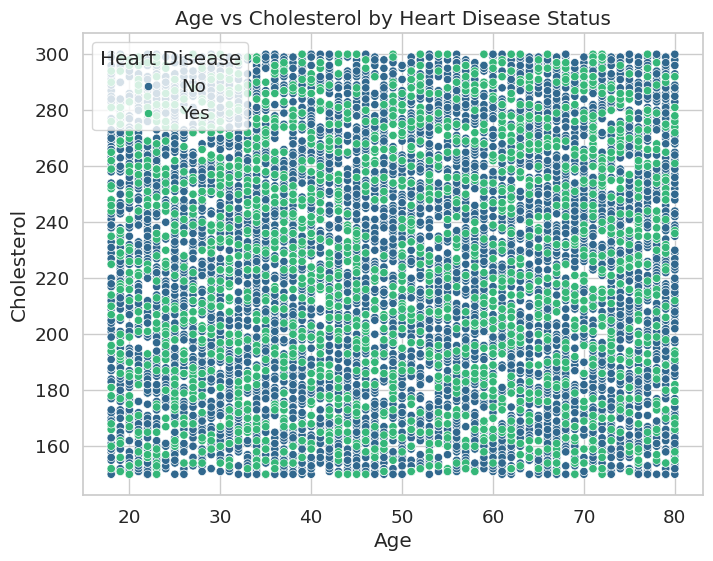

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol Level', data=data, hue='Heart Disease Status', palette='viridis')
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease')
plt.show()

***5.4 Bar plot for categorical data ***

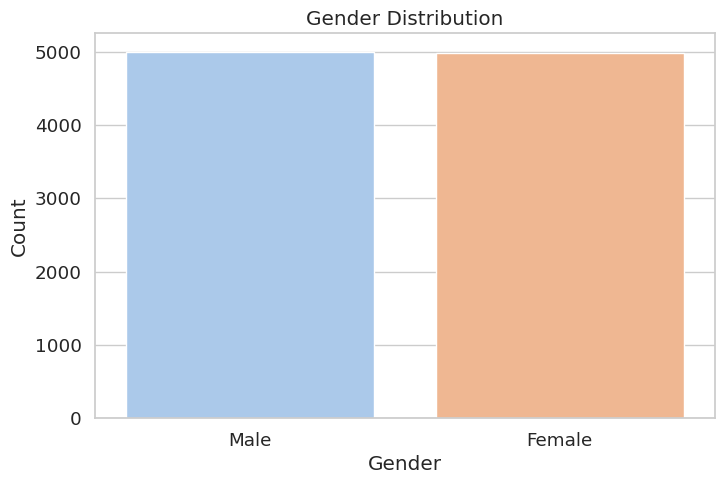

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, hue='Gender', palette='pastel', dodge=False, legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [29]:
gender_distribution = data['Gender'].value_counts()
gender_distribution

,count
Gender,
Male,5003
Female,4978


***Save the data***

In [30]:
data.to_csv('processed_heart_disease.csv', index=False)
print("Analysis complete. Visualizations displayed, and processed data saved as 'processed_heart_disease.csv'.")

Analysis complete. Visualizations displayed, and processed data saved as 'processed_heart_disease.csv'.


***Download the Final file from here***

In [31]:
files.download('processed_heart_disease.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>